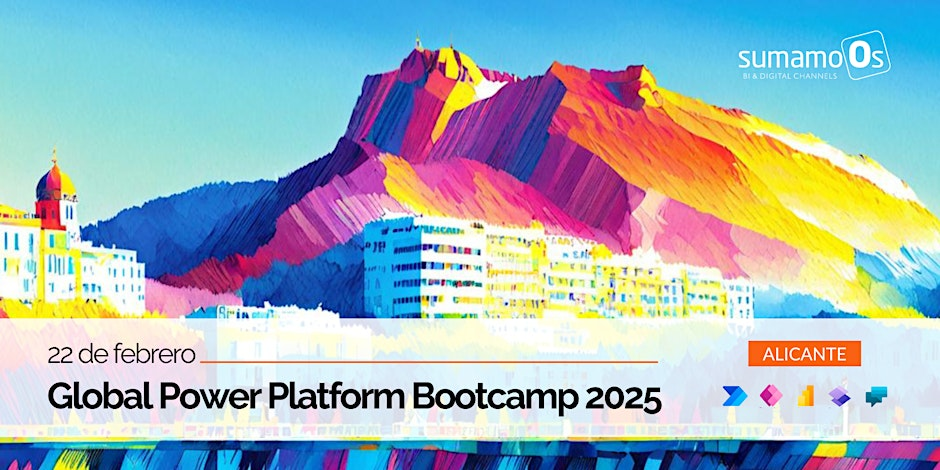

## 1️⃣ **Referenciar a otro cuaderno existente**
---

Mediante el comando _**%run**_ podemos hacer referencia a otros cuadernos, pero debe tenerse en cuenta que:
- Solo podemos referenciar cuadernos que residan en la misma área de trabajo
- Hay soporte para cuatro tipos de parámetros (int, float, bool y string)
- Se pueden referenciar cuadernos hasta cinco niveles de profundidad, pero no hacer llamadas recursivas


##### 🔗 Referencia al cuaderno 🔗
**⚠️ La celda no puede contener otras instrucciones o comentarios ⚠️**

In [1]:
%run notebook_references

StatementMeta(, 73baf0d8-d489-440c-ae58-cd2c5d339125, 3, Finished, Available, Finished)

Hola, soy un notebook llamado como referencia


##### 🪄 Una vez referenciado, podemos hacer uso de variables y métodos que contenga en su interior 🪄

In [2]:
# Uso de variables del cuaderno referenciado
print(
    f"Esta es una de las variable del cuaderno referenciado: {referenced_sample_var1}"
)

# Uso de métodos que importa el cuaderno referenciado
time.sleep(referenced_sample_var2)
print(f"Esperamos un total de {referenced_sample_var2} segundos.")

StatementMeta(, 73baf0d8-d489-440c-ae58-cd2c5d339125, 4, Finished, Available, Finished)

Esta es una de las variable del cuaderno referenciado: Hola a tod@s
Esperamos un total de 5 segundos.


## 2️⃣ **Ejecutar cuadernos mediante notebookutils**
---

Además del método anterior, tenemos disponibles más alternativas gracias a la librería **_notebookutils_**

In [3]:
notebookutils.notebook.help()

StatementMeta(, 73baf0d8-d489-440c-ae58-cd2c5d339125, 5, Finished, Available, Finished)

##### 📒 Ejecución única con _**notebookutils.notebook.run()**_ 📒
---

Este método hace referencia a un cuaderno y puede devolver un valor de salida
- Puede ejecutar llamadas a funciones anidadas de forma interactiva o en una canalización
- El cuaderno al que se hace referencia se ejecuta en el pool de Spark del cuaderno que llama a esta función
- No hay límite en cuanto al nº y tipos de parámetros que podemos pasarle
- El cuaderno invocado puede residir en otra área de trabajo

In [ ]:
# Ejecución de un único cuaderno con paso de parámetros
notebook_input_value: int = 87
notebookutils.notebook.run(
    "notebook_single_call", 90, {"caller_input_value": notebook_input_value}
)


notebook_input_value: int = 65
notebook_exit_value = notebookutils.notebook.run(
    "notebook_single_call", 90, {"caller_input_value": notebook_input_value}
)
print(f"El cuaderno devolvió el siguiente valor: {notebook_exit_value}")

##### 📚 Ejecución múltiple con _**notebookutils.notebook.runMultiple()**_ 📚
---

El método nos permite ejecutar múltiples cuadernos en paralelo o con una estructura predefinida. La API utiliza un mecanismo de implementación multihilo dentro de una sesión de Spark, lo que significa que los cuadernos invocados comparten los recursos.

**⚠️ Por ahora este método se encuentra en versión preliminar ⚠️**

Gracias a él, podemos:
+ Ejecutar varios cuadernos simultáneamente, sin esperar a que termine cada uno
+ Especificar dependencias y el orden de ejecución
+ Optimizar y reducir el uso de recursos
+ Ver las instantáneas de cada registro de ejecución y depurar según se precise
+ Obtener el valor de salida de cada actividad y utilizarlo en tareas posteriores


In [ ]:
# Comando de ayuda sobre el método
notebookutils.notebook.help("runMultiple")

In [ ]:
# Llamada múltiple de forma simple
notebookutils.notebook.runMultiple(
    ["notebook_multiple_simplecall1", "notebook_multiple_simplecall2"]
)

In [ ]:
# Llamada múltiple de forma elaborada
execution_dag = {
    "activities": [
        {
            "name": "Actividad_01", # Nombre de la actividad, debe ser único
            "path": "notebook_multiple_dagcall1", # Nombre del cuaderno invocado
            "timeoutPerCellInSeconds": 90, # Tiempo máximo de ejecución para cada celda, por defecto 90"
            "args": {"input_param01": "Esta es la primera llamada con valor ", "input_param02": 1}, # Parámetros que recibe el cuaderno
        },
        {
            "name": "Actividad_02",
            "path": "notebook_multiple_dagcall2",
            "timeoutPerCellInSeconds": 120,
            "args": {"input_param01": "Esta es la segunda llamada con valor ", "input_param02": 2}
        },
        {
            "name": "Actividad_03",
            "path": "notebook_multiple_dagcall3",
            "timeoutPerCellInSeconds": 120,
            "args": {"input_param01": "Esta es la tercera llamada con valor ", "input_param02": 3},
            "retry": 1, # Número de reintentos
            "retryIntervalInSeconds": 5, # Tiempo entre reintentos
            "dependencies": ["Actividad_02"] # Listado para definir dependencias de ejecución
        }
    ],
    "timeoutInSeconds": 3600, # Tiempo máximo de ejecución para el DAG (por defecto 12 horas)
    "concurrency": 5 # Número máximo de cuadernos en paralelo (por defecto 50)
}

multiple_exec_result = notebookutils.notebook.runMultiple(execution_dag, {"displayDAGViaGraphviz": True})

In [ ]:
print(multiple_exec_result['Actividad_01']['exitVal'])